# Assignment - 05
## Tree Ensemble

## Nakul Ramesh Varma - 21BDA35

### Question 1

Apply boosting, bagging, and random forests to a data set of your choos-ing for a classification problem.  Fit the models on a train and test set.Evaluate your models, and compare your results against logistic regression and SVMs.  Which models produce better results?  Try to explain your results.

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
rfc = RandomForestClassifier(n_estimators = 100, random_state = 18)
svm = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='linear'))
ada = AdaBoostClassifier(n_estimators=100)
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf = LogisticRegression(random_state=0, max_iter=1000)

In [5]:
bagging.fit(X_train,y_train)
rfc.fit(X_train,y_train)
svm.fit(X_train,y_train)
ada.fit(X_train,y_train)
gbc.fit(X_train,y_train)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [6]:
print("Training accuracy: \n")
print("Logistic regression score = ",clf.score(X_train, y_train))
print("Bagging score = ",bagging.score(X_train, y_train))
print("SVM score = ",svm.score(X_train, y_train))
print("Ada boosting score = ",ada.score(X_train, y_train))
print("Gradient boosting score = ",gbc.score(X_train, y_train))
print("Random forest score = ",rfc.score(X_train, y_train))

Training accuracy: 

Logistic regression score =  0.96
Bagging score =  0.95
SVM score =  0.98
Ada boosting score =  0.93
Gradient boosting score =  0.95
Random forest score =  1.0


In [7]:
print("Testing accuracy: \n")
print("Logistic regression score = ",clf.score(X_test, y_test))
print("Bagging score = ",bagging.score(X_test, y_test))
print("SVM score = ",svm.score(X_test, y_test))
print("Ada boosting score = ",ada.score(X_test, y_test))
print("Gradient boosting score = ",gbc.score(X_test, y_test))
print("Random forest score = ",rfc.score(X_test, y_test))

Testing accuracy: 

Logistic regression score =  1.0
Bagging score =  0.96
SVM score =  0.96
Ada boosting score =  0.9
Gradient boosting score =  0.96
Random forest score =  0.98


In [8]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n-------------------------------")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"\nACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"\nCLASSIFICATION REPORT:\n{clf_report}")

    print("\nTESTING RESULTS: \n-----------------------------")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"\nACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"\nCLASSIFICATION REPORT:\n{clf_report}")

In [9]:
print(evaluate(bagging, X_train, X_test, y_train, y_test))

TRAINIG RESULTS: 
-------------------------------
CONFUSION MATRIX:
[[31  0  0]
 [ 0 32  3]
 [ 0  2 32]]

ACCURACY SCORE:
0.9500

CLASSIFICATION REPORT:
              0          1          2  accuracy   macro avg  weighted avg
precision   1.0   0.941176   0.914286      0.95    0.951821      0.950269
recall      1.0   0.914286   0.941176      0.95    0.951821      0.950000
f1-score    1.0   0.927536   0.927536      0.95    0.951691      0.950000
support    31.0  35.000000  34.000000      0.95  100.000000    100.000000

TESTING RESULTS: 
-----------------------------
CONFUSION MATRIX:
[[19  0  0]
 [ 0 14  1]
 [ 0  1 15]]

ACCURACY SCORE:
0.9600

CLASSIFICATION REPORT:
              0          1        2  accuracy  macro avg  weighted avg
precision   1.0   0.933333   0.9375      0.96   0.956944          0.96
recall      1.0   0.933333   0.9375      0.96   0.956944          0.96
f1-score    1.0   0.933333   0.9375      0.96   0.956944          0.96
support    19.0  15.000000  16.0000      

In [10]:
print(evaluate(clf, X_train, X_test, y_train, y_test))

TRAINIG RESULTS: 
-------------------------------
CONFUSION MATRIX:
[[31  0  0]
 [ 0 32  3]
 [ 0  1 33]]

ACCURACY SCORE:
0.9600

CLASSIFICATION REPORT:
              0          1          2  accuracy   macro avg  weighted avg
precision   1.0   0.969697   0.916667      0.96    0.962121      0.961061
recall      1.0   0.914286   0.970588      0.96    0.961625      0.960000
f1-score    1.0   0.941176   0.942857      0.96    0.961345      0.959983
support    31.0  35.000000  34.000000      0.96  100.000000    100.000000

TESTING RESULTS: 
-----------------------------
CONFUSION MATRIX:
[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]

ACCURACY SCORE:
1.0000

CLASSIFICATION REPORT:
              0     1     2  accuracy  macro avg  weighted avg
precision   1.0   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0   1.0       1.0        1.0           1.0
support    19.0  15.0  16.0       1.0       50.0          50.0
None


In [11]:
print(evaluate(svm, X_train, X_test, y_train, y_test))

TRAINIG RESULTS: 
-------------------------------
CONFUSION MATRIX:
[[31  0  0]
 [ 0 33  2]
 [ 0  0 34]]

ACCURACY SCORE:
0.9800

CLASSIFICATION REPORT:
              0          1          2  accuracy   macro avg  weighted avg
precision   1.0   1.000000   0.944444      0.98    0.981481      0.981111
recall      1.0   0.942857   1.000000      0.98    0.980952      0.980000
f1-score    1.0   0.970588   0.971429      0.98    0.980672      0.979992
support    31.0  35.000000  34.000000      0.98  100.000000    100.000000

TESTING RESULTS: 
-----------------------------
CONFUSION MATRIX:
[[19  0  0]
 [ 0 14  1]
 [ 0  1 15]]

ACCURACY SCORE:
0.9600

CLASSIFICATION REPORT:
              0          1        2  accuracy  macro avg  weighted avg
precision   1.0   0.933333   0.9375      0.96   0.956944          0.96
recall      1.0   0.933333   0.9375      0.96   0.956944          0.96
f1-score    1.0   0.933333   0.9375      0.96   0.956944          0.96
support    19.0  15.000000  16.0000      

In [12]:
print(evaluate(rfc, X_train, X_test, y_train, y_test))

TRAINIG RESULTS: 
-------------------------------
CONFUSION MATRIX:
[[31  0  0]
 [ 0 35  0]
 [ 0  0 34]]

ACCURACY SCORE:
1.0000

CLASSIFICATION REPORT:
              0     1     2  accuracy  macro avg  weighted avg
precision   1.0   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0   1.0       1.0        1.0           1.0
support    31.0  35.0  34.0       1.0      100.0         100.0

TESTING RESULTS: 
-----------------------------
CONFUSION MATRIX:
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]

ACCURACY SCORE:
0.9800

CLASSIFICATION REPORT:
              0          1          2  accuracy  macro avg  weighted avg
precision   1.0   0.937500   1.000000      0.98   0.979167       0.98125
recall      1.0   1.000000   0.937500      0.98   0.979167       0.98000
f1-score    1.0   0.967742   0.967742      0.98   0.978495       0.98000
support    19.0  15.000000  16.000000      0.98  50.000000      50.00000
None


In [13]:
print(evaluate(ada, X_train, X_test, y_train, y_test))

TRAINIG RESULTS: 
-------------------------------
CONFUSION MATRIX:
[[31  0  0]
 [ 0 35  0]
 [ 0  7 27]]

ACCURACY SCORE:
0.9300

CLASSIFICATION REPORT:
              0          1          2  accuracy   macro avg  weighted avg
precision   1.0   0.833333   1.000000      0.93    0.944444      0.941667
recall      1.0   1.000000   0.794118      0.93    0.931373      0.930000
f1-score    1.0   0.909091   0.885246      0.93    0.931446      0.929165
support    31.0  35.000000  34.000000      0.93  100.000000    100.000000

TESTING RESULTS: 
-----------------------------
CONFUSION MATRIX:
[[19  0  0]
 [ 0 15  0]
 [ 0  5 11]]

ACCURACY SCORE:
0.9000

CLASSIFICATION REPORT:
              0          1          2  accuracy  macro avg  weighted avg
precision   1.0   0.750000   1.000000       0.9   0.916667      0.925000
recall      1.0   1.000000   0.687500       0.9   0.895833      0.900000
f1-score    1.0   0.857143   0.814815       0.9   0.890653      0.897884
support    19.0  15.000000  16.00

In [14]:
print(evaluate(gbc, X_train, X_test, y_train, y_test))

TRAINIG RESULTS: 
-------------------------------
CONFUSION MATRIX:
[[31  0  0]
 [ 0 32  3]
 [ 0  2 32]]

ACCURACY SCORE:
0.9500

CLASSIFICATION REPORT:
              0          1          2  accuracy   macro avg  weighted avg
precision   1.0   0.941176   0.914286      0.95    0.951821      0.950269
recall      1.0   0.914286   0.941176      0.95    0.951821      0.950000
f1-score    1.0   0.927536   0.927536      0.95    0.951691      0.950000
support    31.0  35.000000  34.000000      0.95  100.000000    100.000000

TESTING RESULTS: 
-----------------------------
CONFUSION MATRIX:
[[19  0  0]
 [ 0 14  1]
 [ 0  1 15]]

ACCURACY SCORE:
0.9600

CLASSIFICATION REPORT:
              0          1        2  accuracy  macro avg  weighted avg
precision   1.0   0.933333   0.9375      0.96   0.956944          0.96
recall      1.0   0.933333   0.9375      0.96   0.956944          0.96
f1-score    1.0   0.933333   0.9375      0.96   0.956944          0.96
support    19.0  15.000000  16.0000      

### Analysis

From the above reports, for the current dataset random forest performs well in training while logistic regression performs well in testing

### Question 2

 ”https://www.kaggle.com/datasets/uciml/caravan-insurance-challenge ” On the provided data set fit a boosting model.  Which predictors seem to be the most important?  Predict if the person will buy insurace or not.  Compare your results with logistic regression and KNN. Explain your observations.

In [15]:
df = pd.read_csv("caravan-insurance-challenge.csv")

In [16]:
df.head()

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0


In [17]:
df.shape

(9822, 87)

In [18]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [19]:
df.ORIGIN.value_counts()

train    5822
test     4000
Name: ORIGIN, dtype: int64

In [20]:
df_train = df[df.ORIGIN == 'train']

In [21]:
df_train

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,train,36,1,1,2,8,0,6,1,2,...,0,0,0,1,0,0,0,0,0,0
5818,train,35,1,4,4,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
5819,train,33,1,3,4,8,0,6,0,3,...,0,0,0,1,0,0,0,0,0,1
5820,train,34,1,3,2,8,0,7,0,2,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df_test = df[df.ORIGIN == 'test']

In [23]:
df_test

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
5822,test,33,1,4,2,8,0,6,0,3,...,0,0,0,1,0,0,0,0,0,0
5823,test,6,1,3,2,2,0,5,0,4,...,0,0,0,1,0,0,0,0,0,1
5824,test,39,1,3,3,9,1,4,2,3,...,0,0,0,1,0,0,0,0,0,0
5825,test,9,1,2,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
5826,test,31,1,2,4,7,0,2,0,7,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9817,test,33,1,2,4,8,0,7,2,0,...,0,0,0,1,0,0,0,0,0,0
9818,test,24,1,2,3,5,1,5,1,3,...,0,0,0,1,0,0,0,0,0,1
9819,test,36,1,2,3,8,1,5,1,3,...,0,0,0,1,0,0,0,1,0,0
9820,test,33,1,3,3,8,1,4,2,3,...,0,0,0,0,0,0,0,0,0,0


In [24]:
X_train = df_train.drop(columns=['ORIGIN','CARAVAN'])
y_train = df_train["CARAVAN"]
X_test = df_test.drop(columns=['ORIGIN','CARAVAN'])
y_test = df_test["CARAVAN"]

In [25]:
ada = AdaBoostClassifier(n_estimators=100)

In [26]:
ada.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [27]:
ada.score(X_test, y_test)

0.93825

In [28]:
print(evaluate(ada, X_train, X_test, y_train, y_test))

TRAINIG RESULTS: 
-------------------------------
CONFUSION MATRIX:
[[5446   28]
 [ 330   18]]

ACCURACY SCORE:
0.9385

CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.942867    0.391304  0.938509     0.667086      0.909898
recall        0.994885    0.051724  0.938509     0.523305      0.938509
f1-score      0.968178    0.091371  0.938509     0.529774      0.915768
support    5474.000000  348.000000  0.938509  5822.000000   5822.000000

TESTING RESULTS: 
-----------------------------
CONFUSION MATRIX:
[[3746   16]
 [ 231    7]]

ACCURACY SCORE:
0.9383

CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.941916    0.304348   0.93825     0.623132      0.903981
recall        0.995747    0.029412   0.93825     0.512579      0.938250
f1-score      0.968084    0.053640   0.93825     0.510862      0.913674
support    3762.000000  238.000000   0.93825  4000.000000   4000.00

To find most important predictor:

Feature: 1, Score: 0.04000
Feature: 2, Score: 0.01000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.01000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.02000
Feature: 7, Score: 0.03000
Feature: 8, Score: 0.01000
Feature: 9, Score: 0.03000
Feature: 10, Score: 0.02000
Feature: 11, Score: 0.01000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.02000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.01000
Feature: 16, Score: 0.03000
Feature: 17, Score: 0.01000
Feature: 18, Score: 0.02000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.02000
Feature: 22, Score: 0.02000
Feature: 23, Score: 0.03000
Feature: 24, Score: 0.01000
Feature: 25, Score: 0.01000
Feature: 26, Score: 0.02000
Feature: 27, Score: 0.03000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.03000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.01000
Feature: 32, Score: 0.02000
Feature: 33, Score: 0.01000
Feature: 34, Score: 0.05000
Feature: 35, Score: 0.01000
Feature: 36, Score: 0.00000
F

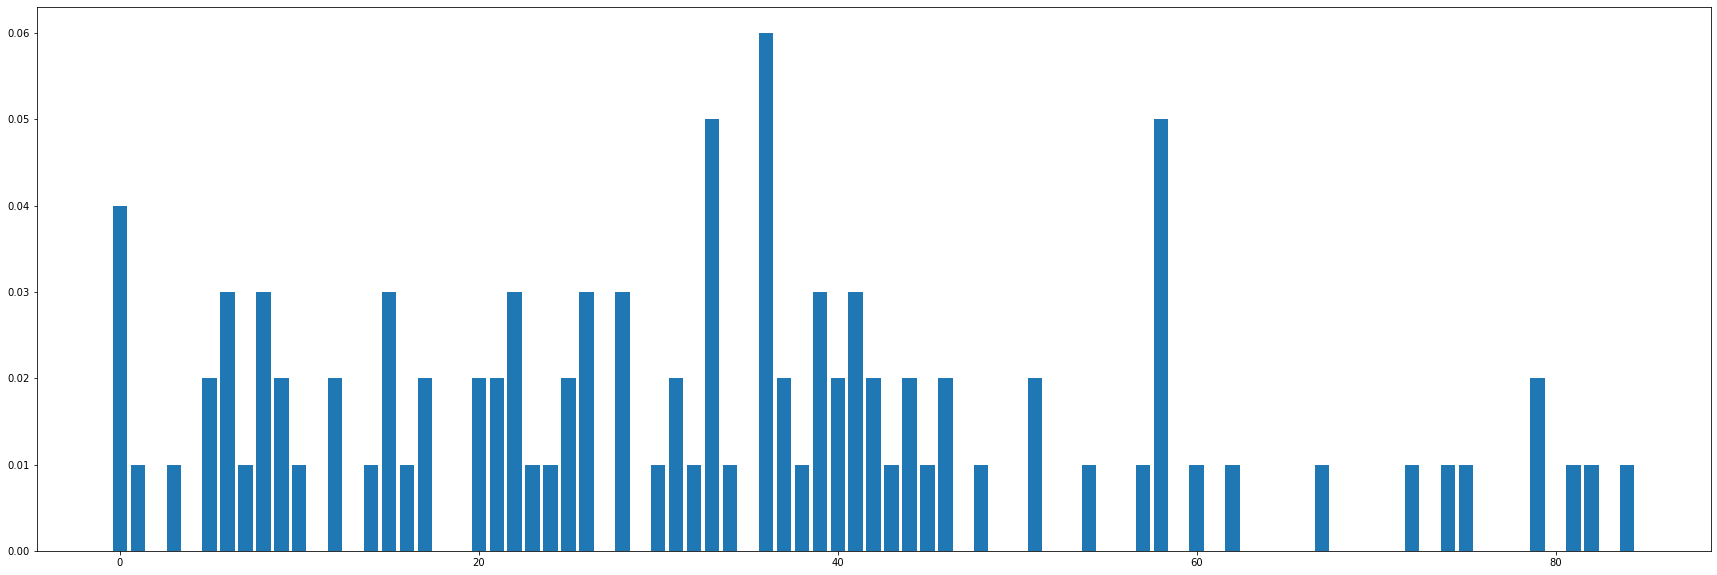

In [29]:
importance = ada.feature_importances_
max = 0
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i+1,v))
    if v > max:
        max = v
        feature = i
plt.figure(figsize=(30,10))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [30]:
print("Most important predictor = ",df.columns[feature])

Most important predictor =  MZPART


In [31]:
clf = LogisticRegression(max_iter = 10000,random_state = 48)

In [32]:
clf.fit(X_train,y_train)

LogisticRegression(max_iter=10000, random_state=48)

In [33]:
clf.score(X_test, y_test)

0.94

In [34]:
print(evaluate(clf, X_train, X_test, y_train, y_test))

TRAINIG RESULTS: 
-------------------------------
CONFUSION MATRIX:
[[5467    7]
 [ 343    5]]

ACCURACY SCORE:
0.9399

CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.940964    0.416667  0.939883     0.678815      0.909625
recall        0.998721    0.014368  0.939883     0.506545      0.939883
f1-score      0.968983    0.027778  0.939883     0.498380      0.912724
support    5474.000000  348.000000  0.939883  5822.000000   5822.000000

TESTING RESULTS: 
-----------------------------
CONFUSION MATRIX:
[[3757    5]
 [ 235    3]]

ACCURACY SCORE:
0.9400

CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.941132    0.375000      0.94     0.658066      0.907447
recall        0.998671    0.012605      0.94     0.505638      0.940000
f1-score      0.969048    0.024390      0.94     0.496719      0.912841
support    3762.000000  238.000000      0.94  4000.000000   4000.00

In [35]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
neigh.score(X_test, y_test)

0.93725

In [37]:
print(evaluate(neigh, X_train, X_test, y_train, y_test))

TRAINIG RESULTS: 
-------------------------------
CONFUSION MATRIX:
[[5462   12]
 [ 329   19]]

ACCURACY SCORE:
0.9414

CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.943188    0.612903  0.941429     0.778045      0.923446
recall        0.997808    0.054598  0.941429     0.526203      0.941429
f1-score      0.969729    0.100264  0.941429     0.534997      0.917758
support    5474.000000  348.000000  0.941429  5822.000000   5822.000000

TESTING RESULTS: 
-----------------------------
CONFUSION MATRIX:
[[3745   17]
 [ 234    4]]

ACCURACY SCORE:
0.9373

CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.941191    0.190476   0.93725     0.565834      0.896524
recall        0.995481    0.016807   0.93725     0.506144      0.937250
f1-score      0.967575    0.030888   0.93725     0.499232      0.911842
support    3762.000000  238.000000   0.93725  4000.000000   4000.00

### Analysis

For training KNN performs better while for testing logistic regression performs better

### Question 3

On  a  data  set  of  your  choosing,  fit  a  regression  tree  model.   Show  how pruning can imporve your model.

In [38]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [39]:
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
        0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
        0.02314163, 0.03422475, 0.32729844]),
 'impurities': array([0.        , 0.00453294, 0.01847522, 0.02313502, 0.02876883,
        0.03581108, 0.04365302, 0.05276704, 0.0642107 , 0.0831987 ,
        0.10634033, 0.14056508, 0.46786352])}

Text(0, 0.5, 'total impurity of leaves')

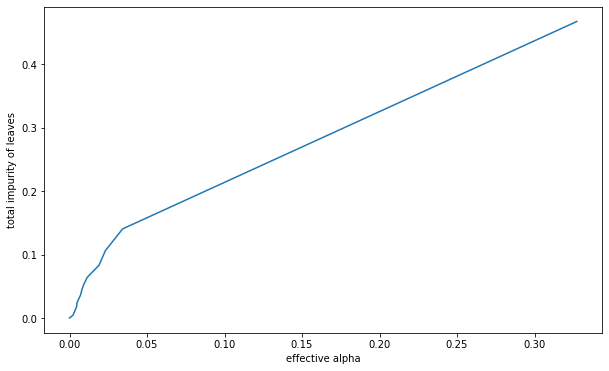

In [40]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

In [41]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'total depth')

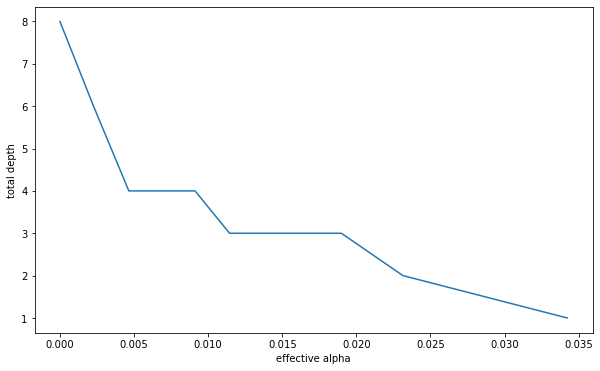

In [42]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")

Text(0, 0.5, 'Accuracy scores')

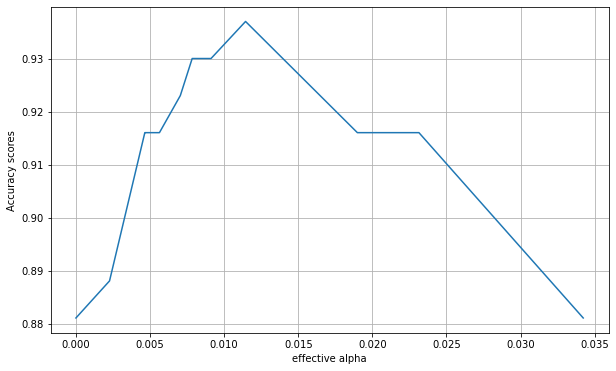

In [43]:
from sklearn.metrics import accuracy_score

acc_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

We can clearly see that somewhere around 0.013 alpha, we get a very good value of accuracy.

### Question 4

For all the models you fit, evaluate the models.  Explain your results.

This has been done above